In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv("loan_approval_data.csv")

In [12]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [14]:
df.isnull().sum()

,0
Applicant_ID,50
Applicant_Income,50
Coapplicant_Income,50
Employment_Status,50
Age,50
Marital_Status,50
Dependents,50
Credit_Score,50
Existing_Loans,50
DTI_Ratio,50


In [15]:
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


HANDLE MISSING VALUES

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

In [17]:
categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [18]:
numerical_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

SIMPLE IMPUTER

In [19]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy = "mean")
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])

In [20]:
cat_imp = SimpleImputer(strategy = "most_frequent")
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])

In [21]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [22]:
df.isnull().sum()

,0
Applicant_ID,0
Applicant_Income,0
Coapplicant_Income,0
Employment_Status,0
Age,0
Marital_Status,0
Dependents,0
Credit_Score,0
Existing_Loans,0
DTI_Ratio,0


EDA

Text(0.5, 1.0, 'Is loan approved or not?')

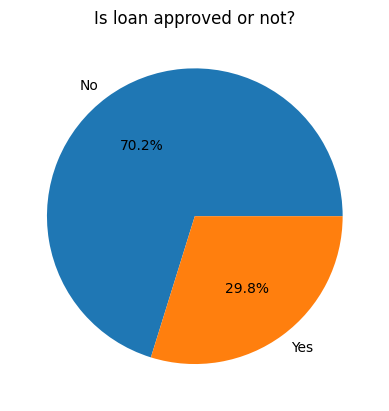

In [23]:
#how balanced our classses are

classes_count = df["Loan_Approved"].value_counts()
plt.pie(classes_count,labels=["No","Yes"],autopct = "%1.1f%%")
plt.title("Is loan approved or not?")

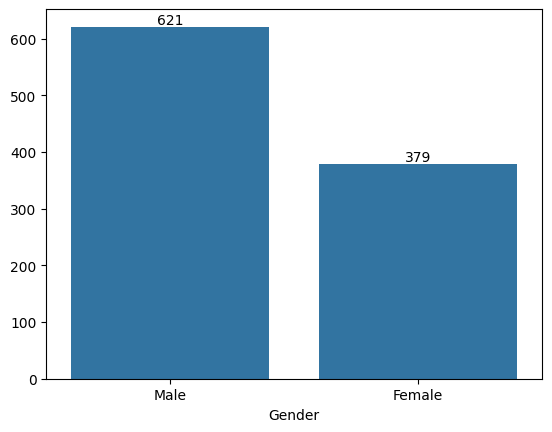

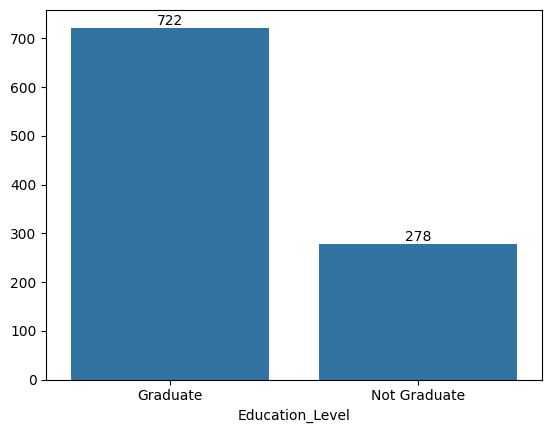

In [24]:
gender_cnt = df["Gender"].value_counts()
ax = sns.barplot(x=gender_cnt.index, y=gender_cnt.values)
ax.bar_label(ax.containers[0])
plt.show()

edu_cnt = df["Education_Level"].value_counts()
bx = sns.barplot(x=edu_cnt.index, y=edu_cnt.values)
bx.bar_label(bx.containers[0])
plt.show()

<Axes: xlabel='Applicant_Income', ylabel='Count'>

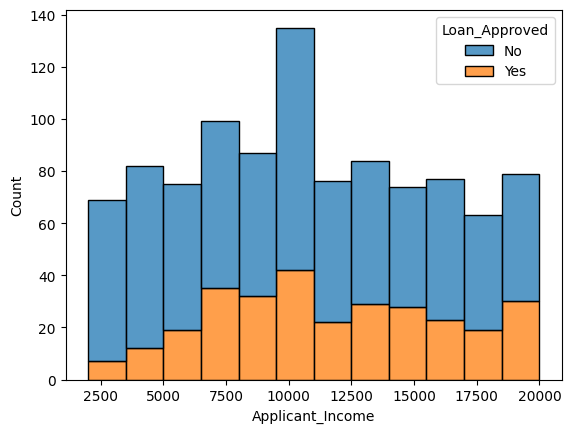

In [25]:
#analyze income

sns.histplot(
    data = df,
    x = "Applicant_Income",
    hue = "Loan_Approved",
    multiple = "stack",
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

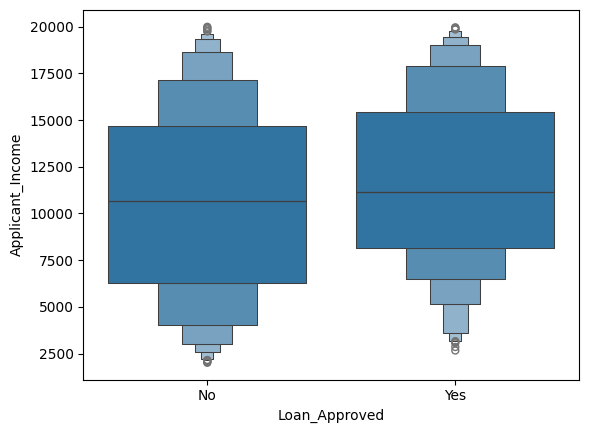

In [26]:
#detect outliers - boxplot

sns.boxenplot(
    data = df,
    x="Loan_Approved",
    y="Applicant_Income",
)

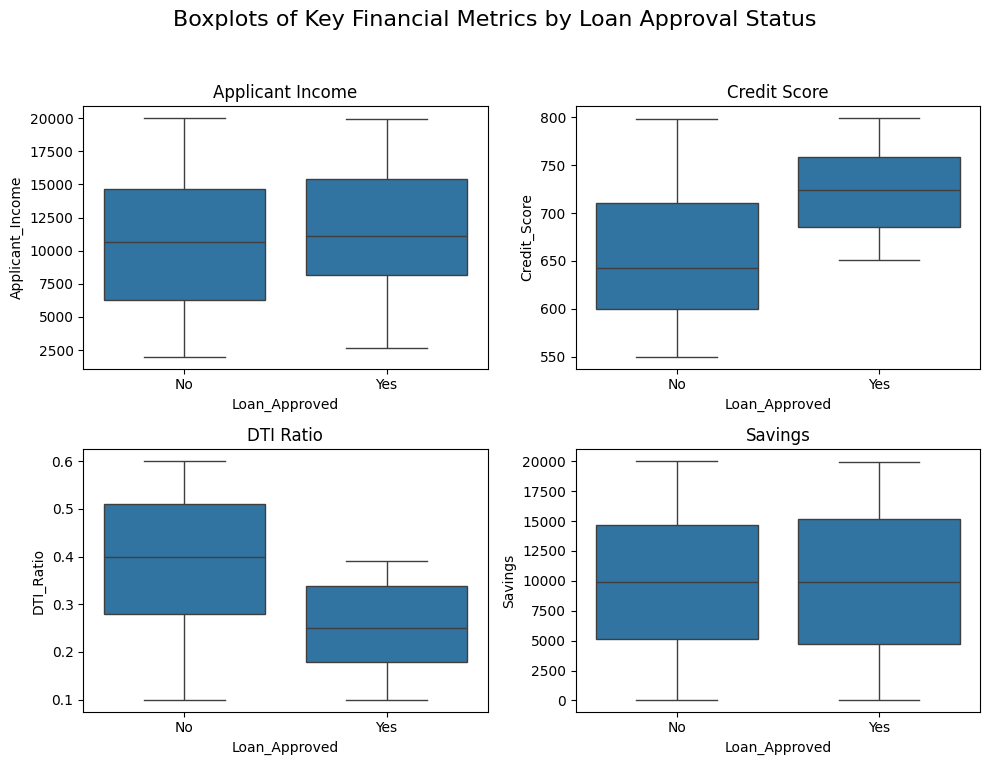

In [27]:
fig,axes = plt.subplots(2,2, figsize=(10, 8))
fig.suptitle('Boxplots of Key Financial Metrics by Loan Approval Status', fontsize=16)

sns.boxplot(ax = axes[0,0], data = df, x="Loan_Approved", y="Applicant_Income")
axes[0,0].set_title('Applicant Income')
sns.boxplot(ax = axes[0,1], data = df, x="Loan_Approved", y="Credit_Score")
axes[0,1].set_title('Credit Score')
sns.boxplot(ax = axes[1,0], data = df, x="Loan_Approved", y="DTI_Ratio")
axes[1,0].set_title('DTI Ratio')
sns.boxplot(ax = axes[1,1], data = df, x="Loan_Approved", y="Savings")
axes[1,1].set_title('Savings')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()

<Axes: xlabel='Credit_Score', ylabel='Count'>

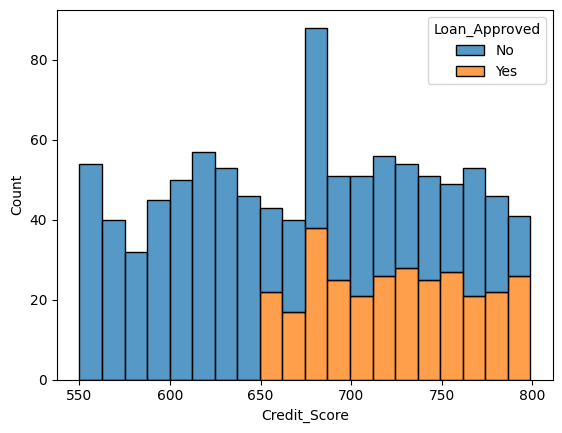

In [28]:
#Creit score with loan approved

sns.histplot(
    data = df,
    x = "Credit_Score",
    hue = "Loan_Approved",
    multiple = "stack",
    bins = 20
)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

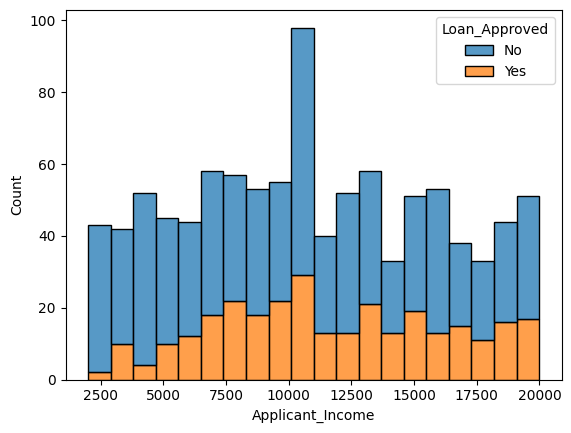

In [29]:
#Creit score with loan approved

sns.histplot(
    data = df,
    x = "Applicant_Income",
    hue = "Loan_Approved",
    multiple = "stack",
    bins = 20
)

In [30]:
#remove applicant id

df = df.drop("Applicant_ID",axis = 1)

In [31]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


ENCODING

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])
df["Education_Level"] = le.fit_transform(df["Education_Level"])



In [33]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [34]:
cols = ["Employment_Status","Marital_Status","Loan_Purpose","Property_Area","Gender","Education_Level","Employer_Category"]

ohe = OneHotEncoder(sparse_output=False,drop="first",handle_unknown="ignore")

encoded = ohe.fit_transform(df[cols])

encoded_df = pd.DataFrame(encoded,columns=ohe.get_feature_names_out(),index = df.index)

In [35]:
df = pd.concat([df.drop(columns = cols), encoded_df],axis=1)

In [36]:
df.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Education_Level_1,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Loan_Approved                    1000 non-null   int64  
 12  Employment_Status_Sal

CORRELATION HEATMAP

In [38]:
num_cols = df.select_dtypes(include="number")

corr_matrix = num_cols.corr()

In [39]:
corr_matrix

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Education_Level_1,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
Applicant_Income,1.000000,0.007545,-0.023988,-0.026658,-0.009818,-0.010457,-0.009107,-0.028358,0.018789,-0.024143,...,0.074209,-0.031234,0.004845,-0.036260,-0.020871,-0.014593,-0.025011,0.102589,-0.044639,-0.011995
Coapplicant_Income,0.007545,1.000000,0.014306,-0.026733,0.058423,0.012418,0.058078,-0.015047,0.009457,0.001596,...,0.016022,0.059549,-0.010058,0.030045,-0.010148,-0.022918,-0.001146,0.037640,0.004312,-0.047929
Age,-0.023988,0.014306,1.000000,-0.018767,-0.004212,0.023330,0.007903,-0.000986,0.037382,0.013502,...,0.029865,0.037293,0.003100,-0.025661,0.048402,0.025020,-0.066041,0.021232,-0.012960,0.072462
Dependents,-0.026658,-0.026733,-0.018767,1.000000,-0.007687,-0.026338,0.011498,-0.004981,0.023004,-0.017409,...,0.027343,-0.005785,-0.032278,0.024082,0.013706,-0.023493,-0.009250,-0.018757,0.030197,-0.054147
Credit_Score,-0.009818,0.058423,-0.004212,-0.007687,1.000000,-0.007130,0.002338,-0.065353,0.007865,0.001002,...,-0.008658,0.015324,-0.006946,0.004445,-0.039739,0.005367,-0.007076,0.066736,-0.000049,-0.046087
Existing_Loans,-0.010457,0.012418,0.023330,-0.026338,-0.007130,1.000000,0.047008,0.034435,-0.049916,-0.021035,...,0.001777,0.023212,-0.053971,0.035629,-0.038762,-0.008208,-0.009642,0.030520,-0.019306,0.045391
DTI_Ratio,-0.009107,0.058078,0.007903,0.011498,0.002338,0.047008,1.000000,0.004663,-0.009622,0.075784,...,-0.014125,-0.036648,0.044898,-0.006156,0.009624,0.010084,-0.007214,0.002090,-0.003506,0.026018
Savings,-0.028358,-0.015047,-0.000986,-0.004981,-0.065353,0.034435,0.004663,1.000000,0.015481,-0.012208,...,-0.012217,-0.028948,0.005438,0.016833,-0.006667,-0.038536,-0.011683,0.004381,-0.030208,0.027178
Collateral_Value,0.018789,0.009457,0.037382,0.023004,0.007865,-0.049916,-0.009622,0.015481,1.000000,0.002660,...,-0.050975,-0.007120,0.020061,0.007975,0.000897,0.013921,0.035760,-0.013464,-0.014480,-0.009655
Loan_Amount,-0.024143,0.001596,0.013502,-0.017409,0.001002,-0.021035,0.075784,-0.012208,0.002660,1.000000,...,-0.000930,0.032498,0.040206,-0.050076,0.103456,-0.011424,0.013108,-0.025975,0.013923,-0.026566


In [40]:
num_cols.corr()["Loan_Approved"].sort_values(ascending=False)

,Loan_Approved
Loan_Approved,1.000000
Credit_Score,0.451175
Applicant_Income,0.119796
Employer_Category_MNC,0.069049
Loan_Purpose_Personal,0.034043
Marital_Status_Single,0.030182
Property_Area_Urban,0.025963
Collateral_Value,0.021868
Coapplicant_Income,0.004230
Loan_Purpose_Home,0.002118


<Axes: >

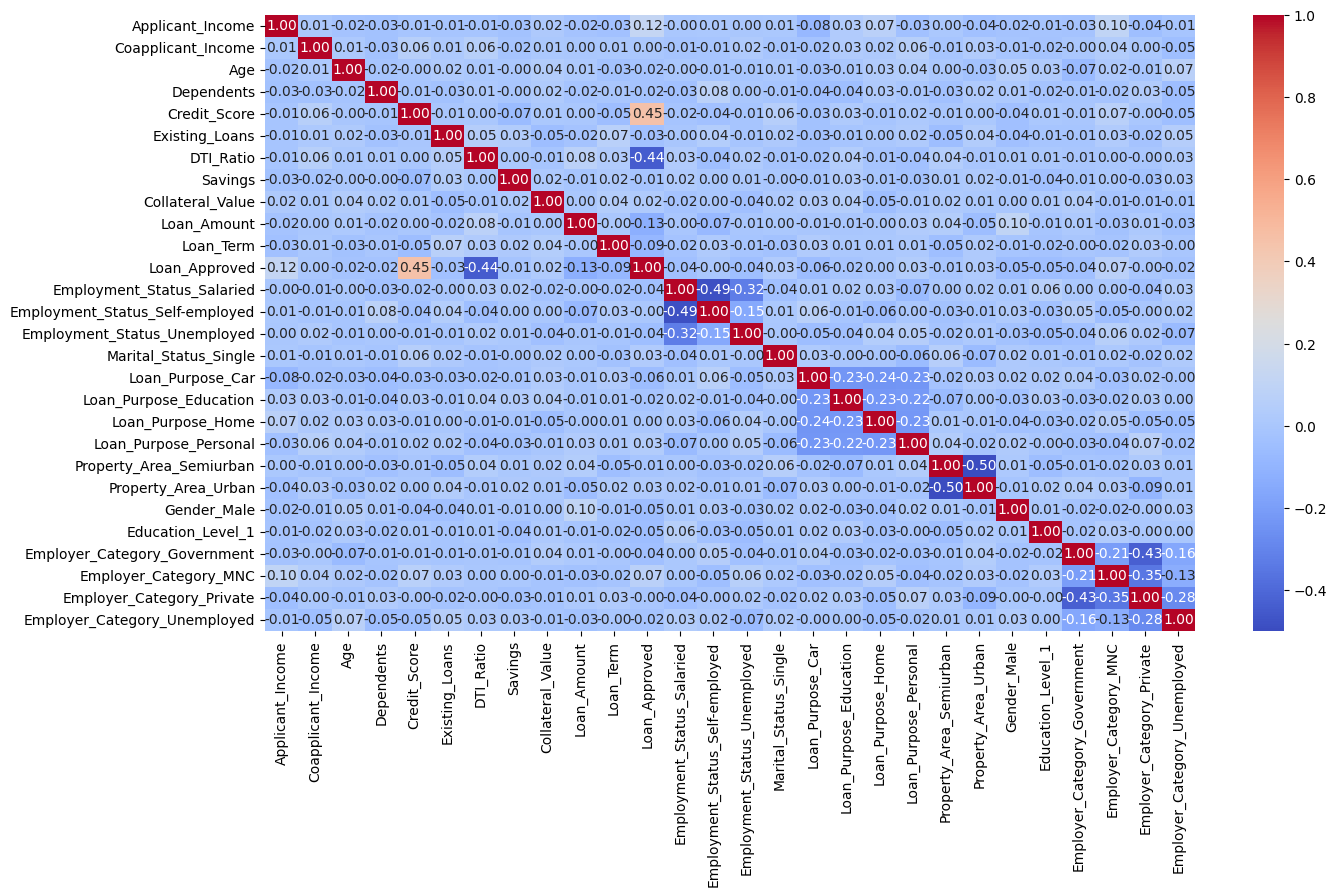

In [41]:
plt.figure(figsize=(15, 8))

sns.heatmap(
    corr_matrix,
    annot = True,
    cmap = "coolwarm",
    fmt = ".2f"
)

TRAIN-TEST-SPLIT + FEATURE SCALING

In [42]:
x = df.drop("Loan_Approved", axis = 1)
y = df["Loan_Approved"]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

TRAIN AND EVALUATE

Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

lr_model = LogisticRegression()
lr_model.fit(x_train_scaled,y_train)

y_pred = lr_model.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.865
Precision: 0.7833333333333333
Recall: 0.7704918032786885
F1 Score: 0.7768595041322314
Confusion Matrix:
 [[126  13]
 [ 14  47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       139
           1       0.78      0.77      0.78        61

    accuracy                           0.86       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.86      0.86      0.86       200



KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x_train_scaled,y_train)

y_pred = knn_model.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.76
Precision: 0.6274509803921569
Recall: 0.5245901639344263
F1 Score: 0.5714285714285714
Confusion Matrix:
 [[120  19]
 [ 29  32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       139
           1       0.63      0.52      0.57        61

    accuracy                           0.76       200
   macro avg       0.72      0.69      0.70       200
weighted avg       0.75      0.76      0.75       200



NAIVE BAYES

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

nb_model = GaussianNB()
nb_model.fit(x_train_scaled,y_train)

y_pred = nb_model.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.865
Precision: 0.8035714285714286
Recall: 0.7377049180327869
F1 Score: 0.7692307692307693
Confusion Matrix:
 [[128  11]
 [ 16  45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       139
           1       0.80      0.74      0.77        61

    accuracy                           0.86       200
   macro avg       0.85      0.83      0.84       200
weighted avg       0.86      0.86      0.86       200



Feature Engineering

In [49]:
df["DTI_Ratio_sq"] = df["DTI_Ratio"]**2
df["Credit_Score_sq"] = df["Credit_Score"]**2

# df["Applicant_Income_log"] = np.log1p(df["Applicant_Income"])

x = df.drop(columns=["Loan_Approved","Credit_Score","DTI_Ratio"])
y = df["Loan_Approved"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [50]:
nb_model = GaussianNB()
nb_model.fit(x_train_scaled,y_train)

y_pred = nb_model.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.86
Precision: 0.8113207547169812
Recall: 0.7049180327868853
F1 Score: 0.7543859649122807
Confusion Matrix:
 [[129  10]
 [ 18  43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       139
           1       0.81      0.70      0.75        61

    accuracy                           0.86       200
   macro avg       0.84      0.82      0.83       200
weighted avg       0.86      0.86      0.86       200



In [51]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x_train_scaled,y_train)

y_pred = knn_model.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.785
Precision: 0.6730769230769231
Recall: 0.5737704918032787
F1 Score: 0.6194690265486725
Confusion Matrix:
 [[122  17]
 [ 26  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       139
           1       0.67      0.57      0.62        61

    accuracy                           0.79       200
   macro avg       0.75      0.73      0.73       200
weighted avg       0.78      0.79      0.78       200



In [52]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled,y_train)

y_pred = lr_model.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.88
Precision: 0.7846153846153846
Recall: 0.8360655737704918
F1 Score: 0.8095238095238095
Confusion Matrix:
 [[125  14]
 [ 10  51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       139
           1       0.78      0.84      0.81        61

    accuracy                           0.88       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.88      0.88      0.88       200



Naive Bayes worked the best

DEPLOYMENT

In [53]:
!pip install streamlit -q
!npm install -g localtunnel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.0 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹
added 22 packages in 3s
⠹
⠹3 packages are looking for funding
⠹  run `npm fund` for details
⠹